# Codes to plot Henon Map Graphs

This note book contains codes to plot figures in the paper related to the Henon map directed from stored data in the *data_pub* folder.
- The *data_pub* folder: (need a link that will not expired)

Note: 
- (a_i, b_i) refers to the initial/start parameter pair: (a0, b0) in the zero-start protocol; or (a-, b-) in the infinite-start protocol;
- (a_f, b_f) refers to then final/end parameter pair: (a+, b+).

In [1]:
'''
Compute the stable fixed points of henon map period 1 directly with formula
Input:
    a: (float) parrameter a
    b: (float) parrameter b
Output:
    x: x-coordinate of the fixed point
    y: y-coordinate of the fixed point
'''
def direct_compute_stable_fixed_point(a, b):
    disc = max((1 - b)**2 + 4 * a, 0)
    if disc < 0 or a == 0:
        return None, None
    x_fp = (-(1 - b) + np.sqrt(disc)) / (2 * a)
    y_fp = b * x_fp
    return x_fp, y_fp

## Basins of attraction
Fig4(b), Fig8(a)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from pathlib import Path

In [3]:
'''
Given fixed point (x_f, y_f) and its basin catefory, plot basin of attraction and the fixed point itself
'''
def plot_fixed_point_basin(basin, x_f, y_f, x_initial_ls, y_initial_ls, 
                           highlight_region=None, xlim=(0, 0), ylim=(0, 0), save_path=None):

    # Define custom colors
    cmap = ListedColormap(['yellow', 'blue'])  # 0 -> yellow, 1 -> blue (inside basin)

    plt.figure(figsize=(6, 6))
    plt.imshow(basin, cmap=cmap, origin='lower',
               extent=[x_initial_ls.min(), x_initial_ls.max(), 
                       y_initial_ls.min(), y_initial_ls.max()])

    
    # fixed point
    plt.plot([x_f], [y_f],
         marker='s',
         linestyle='None',
         color='red',
         markersize=15,
         markeredgewidth=4,
         label='Fixed point')

    # # (OPTIONAL) zoom in box
    # if highlight_region is not None:
    #     (x_min, x_max), (y_min, y_max) = highlight_region
    #     rect = Rectangle(
    #         (x_min, y_min),
    #         x_max - x_min,
    #         y_max - y_min,
    #         linewidth=0.8,
    #         edgecolor='red',
    #         facecolor='none',
    #         linestyle='-'
    #     )
    #     plt.gca().add_patch(rect)
     
    # xlim, ylim
    if not (xlim[0] == 0 and xlim[1] == 0):
        plt.xlim(xlim)
    if not (ylim[0] == 0 and ylim[1] == 0):
        plt.ylim(ylim)

    # legend
    # legend_handles = [
    #     Patch(facecolor='blue', edgecolor='grey', label='Basin of attraction'),
    #     Line2D([0], [0],
    #                marker='x',
    #                linestyle='None',
    #                color='red',
    #                markersize=5.5,
    #                markeredgewidth=1,
    #                label='Fixed point')
    # ]
    
    plt.xlabel(r'$x_0$', fontsize=22)
    plt.ylabel(r'$y_0$', fontsize=22)
    plt.gca().tick_params(labelsize=20)

    # plt.title('Basin of Attraction')
    # leg = plt.legend(handles=legend_handles, loc='upper left', frameon=True)
    # frame = leg.get_frame()
    # frame.set_facecolor("whitesmoke")   # same background
    # frame.set_edgecolor("grey")         # same border color
    # frame.set_linewidth(0.8)            # same border thickness
    # frame.set_alpha(1.0)                # fully opaque   
    # plt.grid(True)
    plt.show()

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

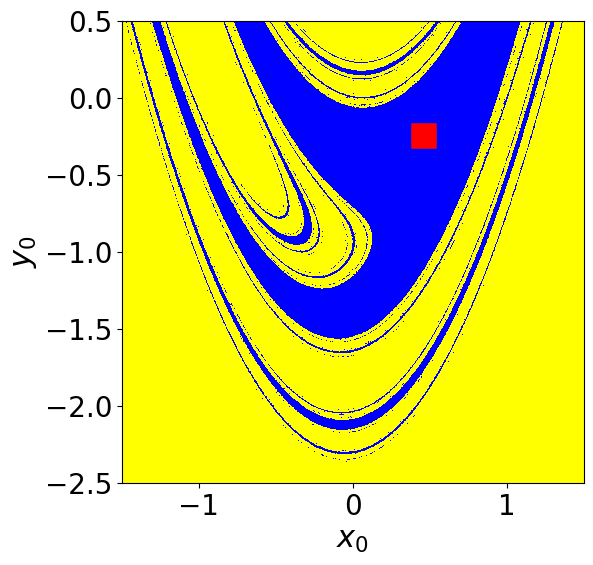

In [4]:
if __name__ == "__main__":
    resolution = 1000

    a_f, b_f = 1.38, -0.54 # protocol 0 - fractal
    # a_f, b_f = 0.2, 0.25  #protocol 0 - smooth
    # a_f, b_f = -0.68, -0.75  #protocol 0 - smooth
    
    x_f, y_f = direct_compute_stable_fixed_point(a_f, b_f)
    
    # load data
    fixed_point_basin = pd.read_csv('data_pub/basinPub_af1.380bf-0.540.csv', comment='#', header=None, dtype=np.uint8).to_numpy()
    # fixed_point_basin = pd.read_csv('data_pub/basinPub_af0.200bf0.250.csv', comment='#', header=None, dtype=np.uint8).to_numpy()
    # fixed_point_basin = pd.read_csv('data_pub/basinPub_af-0.680bf-0.750.csv', comment='#', header=None, dtype=np.uint8).to_numpy()
    

    # x, y ranges
    # these ranges must match the information in the csv file comments
    x_initial_ls = np.linspace(-1.5, 1.5, resolution) # protocol 0 fractal (1.38, -0.54)
    y_initial_ls = np.linspace(-2.5, 0.5, resolution) 

    # x_initial_ls = np.linspace(-8, 8, resolution) # protocol 0 smooth (0.20, 0.25)
    # y_initial_ls = np.linspace(-8, 8, resolution)
    
    # x_initial_ls = np.linspace(-1, 4, resolution) # protocol 0 smooth (-0.68, -0.75)
    # y_initial_ls = np.linspace(-4, 1, resolution)

    # plot graph
    # fig_path = f'graphs_pub/basin_af{a_f:.3f}bf{b_f:.3f}.png' # save path
    # highlight_region = ((-4, -2), (5.5, 7.5)) # zoom-in frame
    highlight_region = None # no zoom-in frame
    plot_fixed_point_basin(fixed_point_basin, x_f, y_f, x_initial_ls, y_initial_ls, highlight_region)

## Parameter Space
Any graphs relevant to the stable region in the parameter space. 

Fig4(a), Fig5.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

import datashader as ds
import datashader.transfer_functions as tf

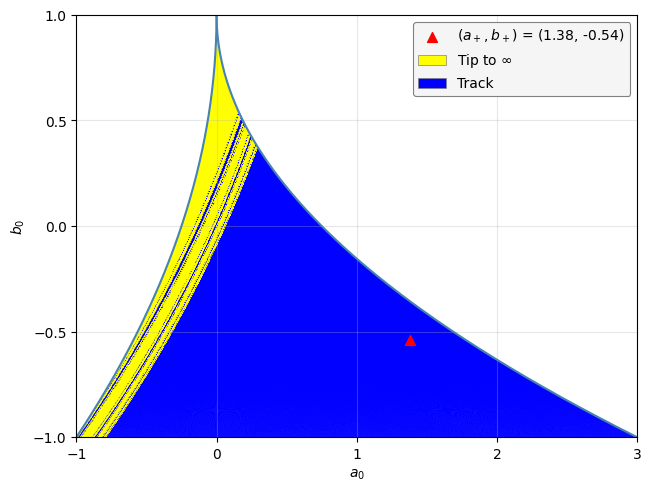

In [6]:
if __name__ == "__main__":
    # --- load files ---
    # CSV = "data_pub/rTipPara_ai0.200bi0.250.csv" # fixed lambda0
    CSV = "data_pub/rTipParaReverse_af1.380bf-0.540.csv" #fixed lambda+
    df = pd.read_csv(
        CSV, comment="#",
        dtype={"category": "category", "a": "float32", "b": "float32"}
    )

    # --- parameters and set up ---    
    # a, b ranges
    A_MIN, A_MAX = -1.0, 3.0 
    B_MIN, B_MAX = -1.0, 1.0
    
    # landscape 
    CANVAS_W, CANVAS_H = 4000, 4000   
    canvas = ds.Canvas(
        plot_width=CANVAS_W,
        plot_height=CANVAS_H,
        x_range=(A_MIN, A_MAX),
        y_range=(B_MIN, B_MAX)
    )
    agg = canvas.points(df, 'a', 'b', ds.count_cat('category'))
    
    # colors
    color_key = {"t": "yellow", "n": "orange", "c": "blue", 'ns': "lightgrey"}
    # color_key = {"t": "lightgrey", "n": "lightgrey", "c": "lightgrey", 'ns': "lightgrey"} # for the stable region plot
    img = tf.shade(agg, color_key=color_key, how="eq_hist")
    img = tf.spread(img, px=2)
    
    rgba = np.asarray(img.to_pil())
    
    # --- plot ---
    fig, ax = plt.subplots(constrained_layout=True)
    
    ax.imshow(
        rgba,
        extent=[A_MIN, A_MAX, B_MIN, B_MAX],  # x=a, y=b
        origin="upper",
        interpolation="nearest",
        aspect="auto"
    )
    
    # Parabola boundaries: a = 3(1-b)^2/4 and a = -(1-b)^2/4
    b_plot = np.linspace(B_MIN, B_MAX, 1000)
    a_curve1 = 3 * (1 - b_plot)**2 / 4
    a_curve2 = - (1 - b_plot)**2 / 4
    
    l1, = ax.plot(a_curve1, b_plot, color="steelblue",
                  label=r"$a = \frac{3(1-b)^2}{4}$")
    l2, = ax.plot(a_curve2, b_plot, color="steelblue",
                  label=r"$a = -\frac{(1-b)^2}{4}$")
    
    # # a = 0 line
    # l3 = ax.axvline(x=0, color="brown", linestyle="--", linewidth=1,
    #                 label=r"$a \ne 0$")
    
    # points (a_i, b_i) and (a_f, b_f)
    pt_handles = []
    # a_i, b_i = 0.2, 0.25  
    # if a_i is not None and b_i is not None:
    #     pt = ax.scatter([a_i], [b_i], s=50, color="red", marker='o',
    #                     label=rf"($a_0, b_0$) = ({a_i:.2f}, {b_i:.2f})")
    #     pt_handles.append(pt)
    
    a_f, b_f = 1.38, -0.54
    if a_f is not None and b_f is not None:
        pt = ax.scatter([a_f], [b_f], s=50, color="red", marker='^',
                        label=rf"($a_+, b_+$) = ({a_f:.2f}, {b_f:.2f})")
        pt_handles.append(pt)    
    
    # --- plots ---
    x_ticks = np.arange(int(A_MIN), int(A_MAX) + 1, 1)
    y_ticks = np.arange(int(B_MIN), int(B_MAX) + 1, 0.5)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    
    ax.set_xlabel(r"$a_0$")
    ax.set_ylabel(r"$b_0$")
    ax.set_xlim(A_MIN, A_MAX)
    ax.set_ylim(B_MIN, B_MAX)
    ax.grid(True, alpha=0.3)
    
    # legend
    patch_handles = [
        Patch(facecolor="yellow", edgecolor="grey", linewidth=0.5, label=r"Tip to $\infty$"), 
        # Patch(facecolor="orange", edgecolor="grey", linewidth=0.5, label="Tip to other orbits"),
        Patch(facecolor="blue", edgecolor="grey", linewidth=0.5, label="Track"),
        # Patch(facecolor="lightgrey", edgecolor="grey", linewidth=0.5, label="Not sufficient")
        # Patch(facecolor="lightgrey", edgecolor="grey", linewidth=0.5, label="Stable Region")
    ]
    # handles = pt_handles + [l1, l2, l3] + patch_handles
    handles = pt_handles + patch_handles
    leg = ax.legend(handles=handles, loc="upper right", frameon=True)
    frame = leg.get_frame()
    frame.set_facecolor("whitesmoke")
    frame.set_edgecolor("grey")
    frame.set_linewidth(0.8)
    frame.set_alpha(1.0)

    plt.show()
    
    # OUT = f"graphs_pub/rTipRegion_ai{a_i:.3f}bi{b_i:.3f}.png"
    # OUT = f"graphs_pub/fixedPointLocation_conventional.png"
    # fig.savefig(OUT, dpi=300, bbox_inches='tight')

## Boundary Panels
Fractal or smooth boundary sets visualised as panels.
Fig6(a), Fig8(b)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator

In [8]:
'''
Plot panels of fractal branch cut with input data labels. 0 - tipping to infinity (yellow); 1 - converge (blue)
Input:
    labels: (list or array) The label values. 0 - converge/track; 1 - tip to infinity
    val_min, val_max: (float) the range limit of the free parameter
    ax: (matplotlib.axes.Axes) Optional. If provided, plot into this axes. Otherwise a new figure is created.
Output:
    fig, ax : Figure and Axes objects
'''
def plot_frac_bar(labels, val_min, val_max, ax=None):
    # cmap = ListedColormap(['orange', 'darkseagreen', 'mistyrose'])
    cmap = ListedColormap(['orange', 'yellow', 'blue'])
    # cmap = ListedColormap(['whitesmoke', 'whitesmoke', 'whitesmoke'])

    ax.imshow([labels],
              aspect="auto",
              interpolation="nearest",
              vmin=-1, vmax=1, # 0 maps to the green (tipping/not converge), and 1 map to the mistyrose (converge)
              cmap=cmap,
              extent=[val_min, val_max, 0, 1])

    ax.set_yticks([])

    return ax

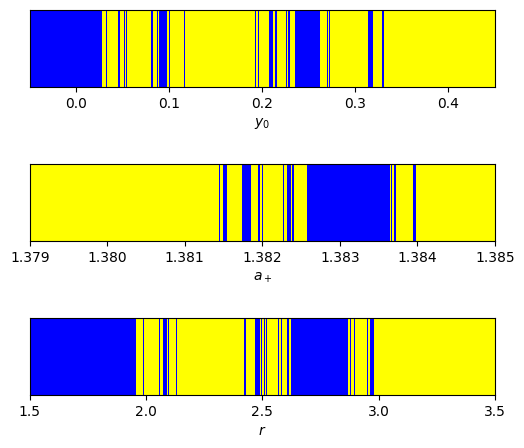

In [9]:
if __name__ == "__main__":
    a_i, b_i = 0.2, 0.25 # protocol 0
    a_f, b_f = 1.38, -0.54 #fractal
    # a_f, b_f = -0.68, -0.75 #smooth

    # RESOLUTION = 30000
    RESOLUTION = 1000

    x_i, y_i = direct_compute_stable_fixed_point(a_i, b_i) 

    # initialise graph
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 5), gridspec_kw={'hspace': 1}, squeeze=False)
    
    ax_basin = axes[0, 0]
    ax_para = axes[1, 0]
    ax_r = axes[2, 0]


    # ---- Basin ---- 
    x_fixed = -0.2 # fractal
    y_min, y_max = -0.05, 0.45 

    # x_fixed = 0.5 # smooth
    # y_min, y_max = -0.12, 0 

    labels_basin = np.loadtxt('data_pub/fracBarLabels_protocol0_basin.csv', dtype=np.uint8, delimiter=',', comments='#')
    # labels_basin = np.loadtxt('data_pub/fracBarLabelsSmooth_protocol0_basin.csv', dtype=np.uint8, delimiter=',', comments='#')

    ax_basin = plot_frac_bar(labels_basin, y_min, y_max, ax=ax_basin)
    ax_basin.set_xlabel(r'$y_0$')
    # ax_basin.set_ylabel('Basin boundary\n' + r'(fixed $x$)')

    patch_out_basin = mpatches.Patch(facecolor='yellow', edgecolor='grey', linewidth=0.5, label=r'Tip to $\infty$')
    patch_in_basin = mpatches.Patch(facecolor='blue', edgecolor='grey', linewidth=0.5, label='Track')

    leg_basin = ax_basin.legend(handles=[patch_out_basin, patch_in_basin], loc="upper right", frameon=True)

    # --- Parameter Space ---
    b_fixed = -0.54 # fractal - fixed lambda0
    a_min, a_max = 1.379, 1.385 
    
    # b_fixed = -0.75 # smooth - fixed lambda0
    # a_min, a_max = -0.7, -0.5

    labels_para = np.loadtxt('data_pub/fracBarLabels_protocol0_para_precise.csv', dtype=np.uint8, delimiter=',', comments='#')
    # labels_para = np.loadtxt('data_pub/fracBarLabelsSmooth_protocol0_para.csv', dtype=np.uint8, delimiter=',', comments='#')

    ax_para = plot_frac_bar(labels_para, a_min, a_max, ax=ax_para)
    ax_para.set_xlabel(r'$a_+$')
    # ax_para.set_ylabel('Parameter space\n' + r'(fixed $b$)')

    patch_tipping_para = mpatches.Patch(facecolor='yellow', edgecolor='grey', linewidth=0.5, label=r'Tip to $\infty$')
    patch_converge_para = mpatches.Patch(facecolor='blue', edgecolor='grey', linewidth=0.5, label='Track')

    leg_para = ax_para.legend(handles=[patch_tipping_para, patch_converge_para], loc="upper right", frameon=True)

    # --- Rate Space ---
    r_min, r_max = 1.5, 3.5 # original - smooth to fractal
    # r_min, r_max = 0.2, 0.44 # smooth to smooth

    labels_r = np.loadtxt('data_pub/fracBarLabels_protocol0_r.csv', dtype=np.uint8, delimiter=',', comments='#')  
    # labels_r = np.loadtxt('data_pub/fracBarLabelsSmooth_protocol0_r.csv', dtype=np.uint8, delimiter=',', comments='#') 

    ax_r = plot_frac_bar(labels_r, r_min, r_max, ax=ax_r)
    ax_r.set_xlabel(r'$r$')
    # ax_r.set_ylabel('r space\n' + '(linear path)')

    patch_tip_r = mpatches.Patch(facecolor='yellow', edgecolor='grey', linewidth=0.5, label=r'Tip to $\infty$')
    patch_noTip_r = mpatches.Patch(facecolor='blue', edgecolor='grey', linewidth=0.5, label='Track')

    leg_r = ax_r.legend(handles=[patch_tip_r, patch_noTip_r], loc="upper right", frameon=True)

    # --- set legend frame and background color ---
    legends = [leg_para, leg_basin, leg_r]
    for leg in legends:
        frame = leg.get_frame()
        frame.set_facecolor("whitesmoke")   # solid white
        frame.set_edgecolor("grey")
        frame.set_linewidth(0.8)
        frame.set_alpha(1.0)       

    # # --- set ticks ---
    # ax_para.xaxis.set_major_locator(MultipleLocator(0.01))
    # ax_basin.xaxis.set_major_locator(MultipleLocator(0.05))
    # ax_r.xaxis.set_major_locator(MultipleLocator(0.1))

    # --- no legend ---
    leg_para.remove()
    leg_basin.remove()
    leg_r.remove()

    # --- font size ---
    plt.rcParams['xtick.labelsize'] = 14 # ticks size
    # plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['axes.labelsize'] = 16 # label text size

    # --- show or save the result ---
    plt.show()

    # plt.savefig(f'graphs_pub/fracBarSmooth_protocol0.png', dpi=300, bbox_inches='tight')

## Uncertainty Exponent 
Fig6(b)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

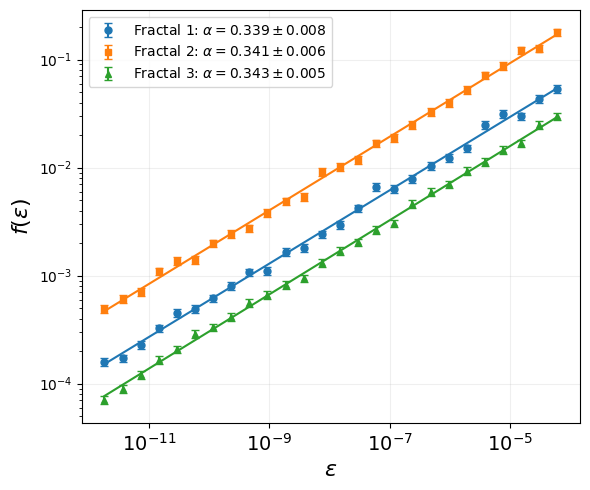

In [11]:
if __name__ == "__main__":
    data_files = [
        'data_pub/fracDim_basin_af1.380bf-0.540.csv',
        'data_pub/fracDim_paraPrecise_b-0.540a1.379a1.385.csv',
        'data_pub/fracDim_r_ai0.200bi0.250_af1.380bf-0.540.csv'
    ]

    names = [
        'Fractal 1',
        'Fractal 2',
        'Fractal 3'
    ]

    tSE = [ # based on other calculation
        0.008,
        0.006,
        0.005
    ]

    symbols = [
        'o',
        's',
        '^' 
    ]

    fig, ax = plt.subplots(figsize=(6, 5))
    handles = []
    for i in range(len(data_files)):
        # control color
        c = f"C{i}" 
        
        # load file
        df = pd.read_csv(data_files[i], comment="#")

        # fetch the values
        used_eps = df["used_eps"].to_numpy()
        f_eps_ls = df["f_eps"].to_numpy()

        # filter out large epsilon
        mask = np.log10(used_eps) < -4 # keep only log10(eps) < -4
        used_eps = used_eps[mask]
        f_eps_ls = f_eps_ls[mask]

        # find error depending on negative binomial dist
        r = 150 # the number of targeted uncertainty trials (based on the head comment in the .csv files)
        err = np.sqrt(f_eps_ls**2 * (1-f_eps_ls)/r) # negative binomial sd: p^2(1-p)/r

        # log space
        log_eps = np.log10(np.array(used_eps, dtype=float))
        log_f = np.log10(np.array(f_eps_ls, dtype=float))
        slope, intercept = np.polyfit(log_eps, log_f, 1)

        # plot
        xline = np.linspace(used_eps.min(), used_eps.max(), 200)
        yline = (xline**slope) * (10**intercept) # f = eps^{slope} * 10^{intercept} 

        ax.errorbar(used_eps, f_eps_ls, yerr=err, fmt=symbols[i], capsize=3, markersize=5, color=c,
                    label=fr"{names[i]}: $\alpha = {slope:.3f} \pm {tSE[i]}$"
                    # label=fr"{names[i]}: $\hat{{\alpha}} = {slope:.3f} \pm {tSE[i]}$ (95% CI)"
                    )
        ax.plot(xline, yline, color=c)  

        # handles.append(
        #     Line2D([0], [0], color=c, marker='o', linestyle='-', linewidth=2, markersize=6,
        #         label=fr"{names[i]}: $\hat{{\alpha}} = {slope:.3f} \pm {tSE[i]}$ (95% CI)")
        # )

    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.xlabel(r'$\epsilon$')
    plt.ylabel(r'$f(\epsilon)$')

    # leg = ax.legend(handles=handles, loc="upper left", frameon=True)
    leg = ax.legend(loc="upper left", frameon=True)
    ax.grid(True, alpha=0.2, linewidth=0.8)
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'graphs_pub/fracDim3in1_protocol0.png', dpi=300, bbox_inches='tight')

**End of File**